In [2]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

0.0%

11.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

38.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

66.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

92.0%IOPub

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.6%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



68.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



119.3%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



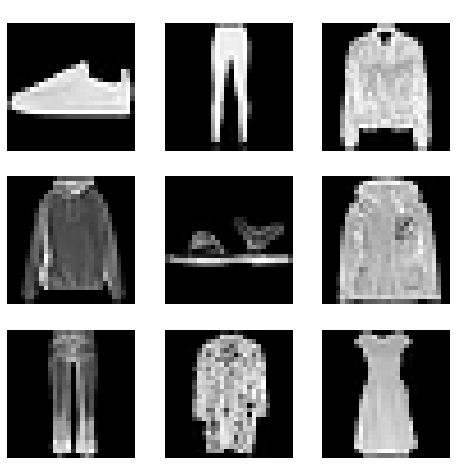

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"}


figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label], color="white")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


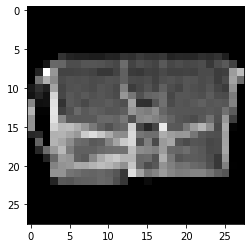

Label: 8


In [8]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [9]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [10]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# Building MODEL

In [12]:
from torch import nn

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


## Define the class

We define our neural network by subclassing `nn.Module`, and 
initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements
the operations on input data in the `forward` method.

Our neural network are composed of the following:
- The input layer with 28x28 or 784 features/pixels.
- The first linear module takes the input 784 features and transforms it to a hidden layer with 512 features
- The ReLU activation function will be applied in the transformation
- The second linear module take 512 features as input from the first hidden layer and transforms it to the next hidden layer with 512 features
- The ReLU activation function will be applied in the transformation
- The third linear module take 512 features as input from the second hidden layer and transforms it to the output layer with 10, which is the number of classes
- The ReLU activation function will be applied in the transformation

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [16]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X) 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1])


In [17]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [18]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [19]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

Non-linear activations are what create the complex mappings between the model's inputs and outputs.
They are applied after linear transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena. In this model, we use `nn.ReLU` between our linear layers, but there's other activations to introduce non-linearity in your model.

The ReLU activation function takes the output from the linear layer calculation and replaces the negative values with zeros.

Linear output: ${ x = {weight * input + bias}} $.  
ReLU:  $f(x)= 
\begin{cases}
    0, & \text{if } x < 0\\
    x, & \text{if } x\geq 0\\
\end{cases}
$

In [20]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.5587,  0.2821,  0.2062,  0.4672,  0.1026, -0.0795,  0.0967, -0.1367,
          0.0751, -0.0281,  0.0033,  0.2924,  1.1141, -0.3699, -0.2461, -0.1337,
          0.2733, -0.1139,  0.2933, -0.1426],
        [-0.3523,  0.4592,  0.2646,  0.8333, -0.0327, -0.3190,  0.3439, -0.0804,
          0.0593, -0.1222, -0.0314, -0.0331,  0.8987, -0.0354, -0.0559, -0.5613,
          0.3857,  0.0693,  0.3697, -0.3229],
        [-0.4418,  0.3696, -0.2420,  0.4797, -0.2253, -0.3177,  0.7427, -0.2106,
         -0.1796, -0.1690, -0.1007, -0.0863,  1.0877, -0.0299, -0.1053, -0.2527,
          0.2952, -0.1433,  0.4038, -0.4256]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.2821, 0.2062, 0.4672, 0.1026, 0.0000, 0.0967, 0.0000, 0.0751,
         0.0000, 0.0033, 0.2924, 1.1141, 0.0000, 0.0000, 0.0000, 0.2733, 0.0000,
         0.2933, 0.0000],
        [0.0000, 0.4592, 0.2646, 0.8333, 0.0000, 0.0000, 0.3439, 0.0000, 0.0593,
         0.0000, 0.0000, 0.0000, 0.8987, 0.0000, 0.00

### nn.Sequential

`nn.Sequential` is an ordered 
container of modules. The data is passed through all the modules in the same order as defined. You can use
sequential containers to put together a quick network like `seq_modules`.

In [22]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax

The last linear layer of the neural network returns `logits` - raw values in \[`-infty`, `infty`], which are passed to the
`nn.Softmax` module. The Softmax activation function is used to calculate the probability of the output from the neural network.  It is only used on the output layer of a neural network.  The results are scaled to values \[0, 1\] representing the model's predicted densities for each class. `dim` parameter indicates the dimension along which the result values must sum to 1.  The node with the highest probability predicts the desired output.



In [24]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0269, -0.0124,  0.0065,  ...,  0.0091, -0.0280, -0.0316],
        [-0.0137, -0.0064,  0.0103,  ...,  0.0082, -0.0158, -0.0328]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0158, -0.0258], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0412, -0.0422,  0.0355,  ..., -0.0388,  0.0086, -0.0087],
        [ 0.0019, -0.0038,  0.0437,  ..., -0.0271, -0.0239, -0.0311]],
       grad_fn=<SliceBackward0>) 

Layer: linear_re

# AUTOMATIC DIFFERENTIATION

## Automatic differentiation with ``torch.autograd``

When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.  The loss function calulates the difference between the expected output and the actual output that a neural network produces.  The goal is to get the result of the loss function as close to zero as possible.  The algorithm traverse backwards through the network network to adjust the weights and bias to retrain the model. That's why it's called back propagation. This back and forward process of retraining the model over time to reduce the loss to 0 is called the gradient descent.

To compute those gradients, PyTorch has a built-in differentiation engine
called `torch.autograd`. It supports automatic computation of gradient for any
computational graph.

Consider the simplest one-layer neural network, with input `x`,
parameters `w` and `b`, and some loss function. It can be defined in
PyTorch in the following manner:

In [26]:
%matplotlib inline
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [27]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7fc05209aba8>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fc05209a7f0>


## Computing gradients

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
`x` and `y`. To compute those derivatives, we call
`loss.backward()`, and then retrieve the values from `w.grad` and
`b.grad`:

In [29]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0630, 0.0979, 0.2267],
        [0.0630, 0.0979, 0.2267],
        [0.0630, 0.0979, 0.2267],
        [0.0630, 0.0979, 0.2267],
        [0.0630, 0.0979, 0.2267]])
tensor([0.0630, 0.0979, 0.2267])


> **Note:** We can only obtain the `grad` properties for the leaf nodes of the computational graph, which have `requires_grad` property set to ``True``. For all other nodes in our graph, gradients will not be available. In addition, we can only perform gradient calculations using ``backward`` once on a given graph, for performance reasons. If we need to do several ``backward`` calls on the same graph, we need to pass ``retain_graph=True`` to the ``backward`` call.

## Disabling gradient tracking

By default, all tensors with `requires_grad=True` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
`torch.no_grad()` block:

In [31]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [32]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


# Optimization loop

In [34]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## Setting hyperparameters 

Hyperparameters are adjustable parameters that let you control the model optimization process. 
Different hyperparameter values can impact model training and the level of accuracy.

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times the entire training dataset is pass through the network. 
 - **Batch Size** - the number of data samples seen by the model in each epoch. Iterates are the number of batches needs to compete an epoch.
 - **Learning Rate** - the size of steps the model match as it searchs for best weights that will produce a higher model accuracy. Smaller values means the model will take a longer time to find the best weights, while larger values may result in the model step over and misses the best weights which yields unpredictable behavior during training.

In [36]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Add an optimization loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each 
iteration of the optimization loop is called an **epoch**. 

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to 
see the `full-impl-label` of the optimization loop.

### Add a loss function

When presented with some training data, our untrained network is likely not to give the correct 
answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, 
and it is the loss function that we want to minimize during training. To calculate the loss we make a 
prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include:
- `nn.MSELoss` (Mean Square Error) used for regression tasks
- `nn.NLLLoss` (Negative Log Likelihood) used for classification
- `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`

We pass our model's output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [38]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimization pass

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent).
All optimization logic is encapsulated in  the ``optimizer`` object. Here, we use the SGD optimizer; additionally, there are many different optimizers
available in PyTorch such as `ADAM' and 'RMSProp`, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.



In [40]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:
 * Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Back-propagate the prediction loss with a call to `loss.backwards()`. PyTorch deposits the gradients of the loss w.r.t. each parameter. 
 * Once we have our gradients, we call ``optimizer.step()`` to adjust the parameters by the gradients collected in the backward pass.

## Full implementation

We define `train_loop` that loops over our optimization code, and `test_loop` that 
evaluates the model's performance against our test data.

In [43]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303636  [    0/60000]
loss: 2.301039  [ 6400/60000]
loss: 2.290618  [12800/60000]
loss: 2.289658  [19200/60000]
loss: 2.280269  [25600/60000]
loss: 2.254221  [32000/60000]
loss: 2.264694  [38400/60000]
loss: 2.245009  [44800/60000]
loss: 2.223163  [51200/60000]
loss: 2.228556  [57600/60000]
Test Error: 
 Accuracy: 36.5%, Avg loss: 0.035119 

Epoch 2
-------------------------------
loss: 2.216347  [    0/60000]
loss: 2.240642  [ 6400/60000]
loss: 2.221061  [12800/60000]
loss: 2.240096  [19200/60000]
loss: 2.226688  [25600/60000]
loss: 2.160177  [32000/60000]
loss: 2.195775  [38400/60000]
loss: 2.155865  [44800/60000]
loss: 2.112072  [51200/60000]
loss: 2.135969  [57600/60000]
Test Error: 
 Accuracy: 37.8%, Avg loss: 0.033861 

Epoch 3
-------------------------------
loss: 2.111733  [    0/60000]
loss: 2.162685  [ 6400/60000]
loss: 2.132719  [12800/60000]
loss: 2.177107  [19200/60000]
loss: 2.155516  [25600/60000]
loss: 2.040992  [32000/600

Saving Models
-------------

When you are satisfied with the model's performance, you can use `torch.save` to save it. PyTorch models store the learned parameters in an internal state dictionary, called `state_dict`. These can be persisted wit the `torch.save` method:

In [46]:
torch.save(model.state_dict(), "data/model.pth")

print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Load and run model predictions 

In [52]:
%matplotlib inline
import torch
import onnxruntime
from torch import nn
import torch.onnx as onnx
import torchvision.models as models
from torchvision import datasets
from torchvision.transforms import ToTensor

In [50]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [51]:
model = NeuralNetwork()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [53]:
input_image = torch.zeros((1,28,28))
onnx_model = 'data/model.onnx'
onnx.export(model, input_image, onnx_model)

In [54]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

In [55]:
session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Sandal", Actual: "Ankle boot"
